# Project Introduction
This Project is a partial fulfillment of the Coursera IBM Data Science certification course. The project requirements are to leverage the “Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve.”  I decided to work on my home town, Tehran, Iran as my project, though the amount of data about Tehran in the internet is low in compare to other cities. Even the Foursquare API may have a limited applicability because the app may not be widely used in my city.

Tehran is the capital of Iran and Tehran Province. With a population of around 8.7 million in the city and 15 million in the larger metropolitan area of Greater Tehran, Tehran is the most populous city in Iran and Western Asia,  and has the second-largest metropolitan area in the Middle East (after Cairo). It is ranked 24th in the world by the population of its metropolitan area. [https://en.wikipedia.org/wiki/Tehran].

Nowadays, international oil companies are developing interest in investing Iran for a number of reasons. The main one is that the sanctions against Iran, especially Iranian oil industry are decreasing these days. Besides, the work force in Iran is much cheaper than other oil-rich countries. Assuming these, some of oil companies are inclined to establish an office in the capital of Iran (Tehran).

From a foreign company view, there are some factors that contribute to select suitable location for installing the office. The important ones are:

•	The location of office should be in business area. (Being close to other government and private offices)

•	The location should have high rate of green environment so the neighborhood would be pleasant for the clerks and workers.

•	Being close to hotels and restaurants with foreign cousine.

•	Easy access to public transports like metro.

In this notebook I will try to compare different potential neighborhoods based on the factors that are important to choose better location for the office of a foreign company. 


# Data Description
In this section, I describe the data that will be used in the project. 
## Data Source 1 – Neighborhood Data
Because of the shortage in data about Greater Tehran in the internet, I decided to carry out my project on Tehran that includes 22 districts. I first need to obtain a list of all the locations or neighborhoods in Tehran. This information will be obtained from the following web address: https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Tehran.
## Data Source 2 – Geographical Coordinates
Geographical coordinates for each neighborhood will be obtained with the aid of GEOPY Library. 
## Data Source 3 – Venue categories
I will use the Foursquare API to retrieve venues, using the coordinates obtained in Data Source 2 above. 


# Install and import required library
In this section I install folium in order to draw maps and import necessary libraries.

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium

# import Beautiful Soup to parse html
from bs4 import BeautifulSoup

# libraries to handle request&requests 
import urllib.request
import requests

# Tehran Map
Tehran latitude and longitude will be obtained from Geopy library and these will be used to draw Tehran map with the help of Folium.

In [2]:
address_tehran = 'Tehran, Iran'

geolocator_tehran = Nominatim(user_agent="tehran_explorer")
location_tehran = geolocator_tehran.geocode(address_tehran)
latitude_tehran = location_tehran.latitude
longitude_tehran = location_tehran.longitude
print('The geograpical coordinate of Tehran are {}, {}.'.format(latitude_tehran, longitude_tehran))

The geograpical coordinate of Tehran are 35.6892523, 51.3896004.


In [3]:
map_tehran = folium.Map(location=[latitude_tehran, longitude_tehran], zoom_start=11)
map_tehran

# Acquiring required data
In this section I will get the neighborhood list of Tehran from Wikipedia site. I will use Beautiful Soup library to parse the html file and then to get my required information from that.

In [4]:
url_tehran='https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Tehran'
page_tehran=urllib.request.urlopen(url_tehran)
soup_tehran=BeautifulSoup(page_tehran,'html.parser')

The content of the page will be shown in the next cell to help us decide which part of that is required.

In [5]:
soup_tehran.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Category:Neighbourhoods in Tehran - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"30de815b-ec75-4923-8005-a8cbd649eac0","wgCSPNonce":!1,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":14,"wgPageName":"Category:Neighbourhoods_in_Tehran","wgTitle":"Neighbourhoods in Tehran","wgCurRevisionId":876864548,"wgRevisionId":876864548,"wgArticleId":6114020,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category link from Wikidata","Neighbourhoods in Iran","Geography of Tehran

By exploring the Wikipedia page and also the content of the file that returned, it can be noticed that the first 20 of ‘url’ tag contains the list of neighborhoods. 

In [6]:
tags_tehran=soup_tehran('ul')
tags_tehran=tags_tehran[0:20]

Now by examining the ‘url’ tag I can extract the list of neighborhoods.

In [7]:
tehran_list1=[]

for tag in tags_tehran:
    for second_tag in tag('a'):
        tehran_list1.append(second_tag.get('title'))
    
tehran_list1

['Abbas Abad (Tehran)',
 'Afsariyeh',
 'Aghdasieh',
 'Ajudanieh',
 'Almahdi, Tehran',
 'Amir Abad',
 'Apadana Residential Complex',
 'Bagh Feiz',
 'Bahar, Tehran',
 'Baharestan (district)',
 'City Park, Tehran',
 'Darabad, Tehran',
 'Darakeh',
 'Darband, Tehran',
 'Dardasht (Tehran)',
 'Darrous',
 'Davoodiyeh',
 'District 14 (Tehran)',
 'Doulat',
 'Ekbatan',
 'Ekhtiarieh',
 'Elahieh',
 'Evin',
 'Farahzad',
 'Farmanieh',
 'Gheytarieh',
 'Gholhak',
 'Gisha',
 'Gomrok',
 'HaftHoz',
 'Jamaran',
 'Jannat Abad',
 'Javadiyeh',
 'Javan Mard-e Ghassab Tomb',
 'Kamranieh',
 'Khavaran, Tehran',
 'Lavizan',
 'Mahmoodieh',
 'Mehran (district)',
 'Narmak',
 'Navvab (district)',
 'Nazi Abad',
 'Nelson Mandela Boulevard (Jordan Street) Tehran',
 'Niavaran',
 'Pasdaran (district)',
 'Piroozi',
 'Punak',
 'Ray, Iran',
 'Resalat (district)',
 "Sa'adat Abad",
 'Sadeghiyeh',
 'Sarsabz (place)',
 'Seyed Khandan',
 'Shahr-e No',
 'Shahr-e ziba',
 'Shahrak-e Gharb',
 'Shahran, Tehran',
 'Shahrara',
 'Shemiran

In this part I will convert the list of neighborhoods to the Pandas Data Frame. By looking at the Data Frame it is clear that it does not include all the neighborhoods. Therefore, I save the missed neighborhoods in the new Data Frame and then concatenate both of them. 

In [8]:
tehran_df1 = pd.DataFrame(tehran_list1,columns =['Neighborhood'])

# Now there are some neighborhoods that they are not in the wikipeida page. Therefore, I added them manually to the data drame.
tehran_list2=['Golestan','Chitgar','Hakimie','District 10','District 15','Karimkhan','Keshavarz Bul','Ali Abad','District 18']
tehran_df2=pd.DataFrame(tehran_list2, columns =['Neighborhood'])

tehran_df=pd.concat([tehran_df1,tehran_df2]).reset_index(drop=True)

# adding two another columns to the data frame in order to save longitude and latitude of the neighborhoods.
tehran_df['Latitude']=0
tehran_df['Longitude']=0

In [13]:
# Some of the Neighborhoods names are not as same as what they are in Geopy API. Therefore, I change them into matched spelling in the Geopy API.

tehran_df['Neighborhood']=tehran_df['Neighborhood'].replace({'Abbas Abad (Tehran)':'Abbas Abad - Andishe','Aghdasieh':'Aqdasiyeh','Ajudanieh':'Ajudaniye',
                                                      'Apadana Residential Complex':'Apadana','Bagh Feiz':'Bagh Feyz','City Park, Tehran':'Hassan Abad',
                                                      'Darrous':'Daros','Doulat':'Darvazeh Dowlat','HaftHoz':'Madaen','Javan Mard-e Ghassab Tomb':'Javanmard Ghassab',
                                                      'Ray, Iran':'Shahr Rey','Shahrak-e Gharb':'Shahrak gharb','Shahran, Tehran':'Shahran Bul','Shemiran':'Shemiran No',
                                                      'Sohrevardi (Neighbourhood)':'Sohrevardi','Toopkhaneh':'Emam Khomeini',})

tehran_df.head()

,Neighborhood,Latitude,Longitude
0,Abbas Abad - Andishe,0,0
1,Afsariyeh,0,0
2,Aqdasiyeh,0,0
3,Ajudaniye,0,0
4,"Almahdi, Tehran",0,0


In this section I will use Geopy API to obtain longitude and latitude of the neighborhoods and then I will add them in the Data Frame.

In [14]:
for item in tehran_df['Neighborhood']:
    address = '{}, Tehran, Iran'.format(item)
    geolocator_tehran = Nominatim(user_agent="tehran_explorer")
    location_tehran = geolocator_tehran.geocode(address)
    if location_tehran is not None:
        tehran_df['Latitude'].loc[tehran_df['Neighborhood']==item] = location_tehran.latitude # adding the latitude to the data frame
        tehran_df['Longitude'].loc[tehran_df['Neighborhood']==item] = location_tehran.longitude # adding the longitude to the data frame
tehran_df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Neighborhood,Latitude,Longitude
0,Abbas Abad - Andishe,35.727298,51.428911
1,Afsariyeh,35.671594,51.454012
2,Aqdasiyeh,35.800858,51.484692
3,Ajudaniye,35.805551,51.480843
4,"Almahdi, Tehran",35.772411,51.325375


As some neighborhoods does not have longitude and latitude in Geopy API and their latitude and longitude is zero in the data frame, I delete these rows from the Data Frame. Also the location of 'Surena Street' is out of my scope so I delete that too.

In [15]:
tehran_df=tehran_df[tehran_df['Latitude']!=0].reset_index(drop=True)
tehran_df=tehran_df.drop(index=tehran_df[tehran_df['Neighborhood']=='Surena Street'].index).reset_index(drop=True)
print(tehran_df.shape)
tehran_df.head()

(77, 3)


,Neighborhood,Latitude,Longitude
0,Abbas Abad - Andishe,35.727298,51.428911
1,Afsariyeh,35.671594,51.454012
2,Aqdasiyeh,35.800858,51.484692
3,Ajudaniye,35.805551,51.480843
4,"Almahdi, Tehran",35.772411,51.325375


In order to use Foursquare API I will need Client ID and Client Secret which I obtained them previously by singing up in Foursquare Developer section. I provide them in the next hidden cell.

In [16]:
# The code was removed by Watson Studio for sharing.

The getNearbyVenues function will be defined here to obtain the necessary information from Foursquare API. I applied several radiuses for the function and found that 650 is the best option for my project.

In [113]:
def getNearbyVenues(names, latitudes, longitudes, radius=650):
    n=0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(n,name)
        n=n+1    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
             name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [114]:

tehran_venues = getNearbyVenues(names=tehran_df['Neighborhood'],
                                   latitudes=tehran_df['Latitude'],
                                   longitudes=tehran_df['Longitude']
                                  )

0 Abbas Abad - Andishe
1 Afsariyeh
2 Aqdasiyeh
3 Ajudaniye
4 Almahdi, Tehran
5 Amir Abad
6 Apadana
7 Bagh Feyz
8 Bahar, Tehran
9 Baharestan (district)
10 Hassan Abad
11 Darabad, Tehran
12 Darakeh
13 Darband, Tehran
14 Dardasht (Tehran)
15 Daros
16 District 14 (Tehran)
17 Darvazeh Dowlat
18 Ekbatan
19 Ekhtiarieh
20 Elahieh
21 Evin
22 Farahzad
23 Farmanieh
24 Gheytarieh
25 Gholhak
26 Gisha
27 Gomrok
28 Madaen
29 Jamaran
30 Jannat Abad
31 Javadiyeh
32 Javanmard Ghassab
33 Kamranieh
34 Khavaran, Tehran
35 Lavizan
36 Mahmoodieh
37 Mehran (district)
38 Narmak
39 Navvab (district)
40 Nazi Abad
41 Niavaran
42 Pasdaran (district)
43 Piroozi
44 Punak
45 Shahr Rey
46 Resalat (district)
47 Sa'adat Abad
48 Sadeghiyeh
49 Sarsabz (place)
50 Seyed Khandan
51 Shahr-e No
52 Shahr-e ziba
53 Shahrak gharb
54 Shahran Bul
55 Shahrara
56 Shemiran No
57 Sohrevardi
58 Tajrish
59 Tarasht
60 Tehranpars
61 Tehransar
62 Emam Khomeini
63 Vanak
64 Velenjak
65 Yaft Abad
66 Yusef Abad
67 Zafaraniyeh
68 Golestan
69 Chi

In [115]:
tehran_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbas Abad - Andishe,35.727298,51.428911,Eskandari Natural & Fresh Dairy Product | لبني...,35.727700,51.431925,Cheese Shop
1,Abbas Abad - Andishe,35.727298,51.428911,Pasha Restaurant | رستوران پاشا ( با مدیریت آق...,35.724844,51.429212,Comfort Food Restaurant
2,Abbas Abad - Andishe,35.727298,51.428911,Pishro Graphic Digital Print Center | چاپ دیج...,35.730693,51.432441,Print Shop
3,Abbas Abad - Andishe,35.727298,51.428911,Armaghan Automobile Technical Services | خدمات...,35.726440,51.434811,Auto Garage
4,Abbas Abad - Andishe,35.727298,51.428911,Hostiran | هاست‌ ایران,35.728850,51.424414,IT Services


In [116]:
# looking at the shape of the data frame
tehran_venues.shape

(1934, 7)

I will group the Data Frame with the neighborhood to get the number of venues each neighborhood has.

In [117]:
tehran_venues_count=tehran_venues.groupby('Neighborhood').count()
tehran_venues_count.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbas Abad - Andishe,46,46,46,46,46,46
Afsariyeh,6,6,6,6,6,6
Ajudaniye,45,45,45,45,45,45
Ali Abad,7,7,7,7,7,7
"Almahdi, Tehran",11,11,11,11,11,11


Now I sort the Data Frame by Venue and then use Matplotlib library to visualize the number of venues hat each neighborhood has. This will help us to compare neighborhoods with the number of venues.

In [118]:
tehran_venues_count_sort=tehran_venues_count.sort_values(by=['Venue'])
tehran_venues_count_sort=tehran_venues_count_sort[['Venue']]
tehran_venues_count_sort.head()

,Venue
Neighborhood,
Shemiran No,1
District 18,2
Lavizan,3
Shahr-e ziba,4
Dardasht (Tehran),4


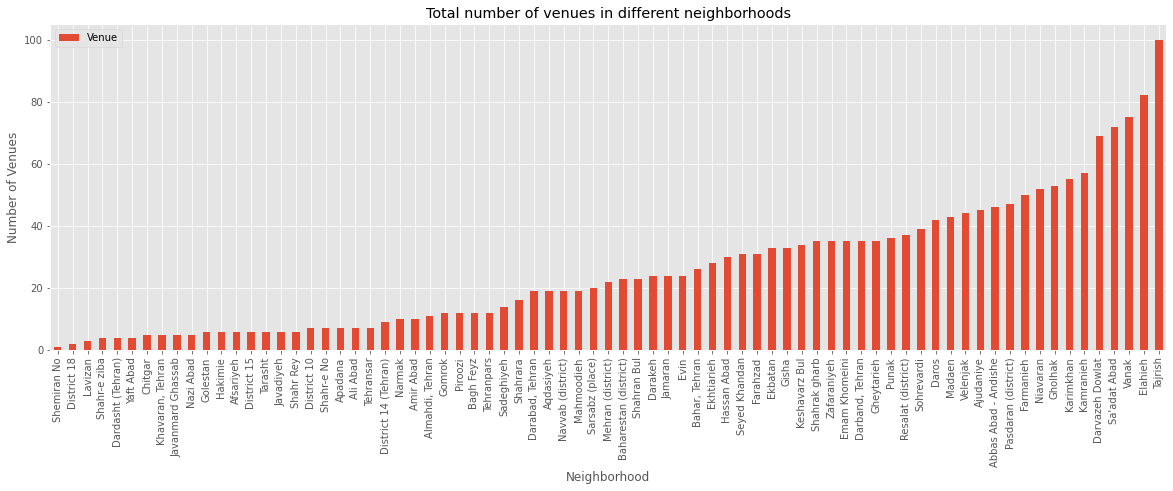

In [119]:
%matplotlib inline
mpl.style.use('ggplot') # for ggplot-like style

tehran_venues_count_sort.plot(kind='bar', figsize=(20, 6))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Venues')
plt.title('Total number of venues in different neighborhoods') 

plt.show()

As the venues are categorical for analyzing them, I need to convert them to numeric equivalent. So, in this section, I encode them to zero and one.

In [120]:
# one hot encoding
tehran_onehot = pd.get_dummies(tehran_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tehran_onehot['Neighborhood'] = tehran_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tehran_onehot.columns[-1]] + list(tehran_onehot.columns[:-1])
tehran_onehot = tehran_onehot[fixed_columns]

tehran_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Ash and Haleem Place,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Court,Bathing Area,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Campground,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Currency Exchange,Czech Restaurant,Dairy Store,Dance Studio,Department Store,Dessert Shop,Diner,Dizi Place,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,General Entertainment,Gift Shop,Gilaki Restaurant,Go Kart Track,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jegaraki,Jewelry Store,Juice Bar,Kebab Restaurant,Leather Goods Store,Lebanese Restaurant,Lighting Store,Luggage Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Mosque,Mountain,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nature Preserve,Notary,Organic Grocery,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Print Shop,Public Art,Record Shop,Recording Studio,Recreation Center,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Sporting Goods Shop,Sports Club,Squash Court,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tabbakhi,Taxi Stand,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Volleyball Court,Water Park,Wings Joint,Women's Store,Yoga Studio
0,Abbas Abad - Andishe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abbas Abad - Andishe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abbas Abad - Andishe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In this part, I grouped the previous Data Frame be neighborhood and use mean function to get the mean frequency of each venue for each neighborhood.

In [121]:
tehran_grouped = tehran_onehot.groupby('Neighborhood').mean().reset_index()
tehran_grouped.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Ash and Haleem Place,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Court,Bathing Area,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Campground,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Currency Exchange,Czech Restaurant,Dairy Store,Dance Studio,Department Store,Dessert Shop,Diner,Dizi Place,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,General Entertainment,Gift Shop,Gilaki Restaurant,Go Kart Track,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jegaraki,Jewelry Store,Juice Bar,Kebab Restaurant,Leather Goods Store,Lebanese Restaurant,Lighting Store,Luggage Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Mosque,Mountain,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nature Preserve,Notary,Organic Grocery,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Print Shop,Public Art,Record Shop,Recording Studio,Recreation Center,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Sporting Goods Shop,Sports Club,Squash Court,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tabbakhi,Taxi Stand,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Volleyball Court,Water Park,Wings Joint,Women's Store,Yoga Studio
0,Abbas Abad - Andishe,0.0,0.0,0.0,0.000000,0.0,0.0,0.043478,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.043478,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.173913,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.000000,0.0,0.021739,0.0,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.021739,0.000000,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.021739,0.0,0.021739,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.043478,0.000000,0.021739,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.021739,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.021739,0.021739,0.043478,0.0,0.0,0.065217,0.0,0.021739,0.0,0.021739,0.000000,0.0,0.0,0.021739,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.065217,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.000000,0.0,0.000000,

In this part, I use a function to sort the venues in descending order. Then, I create the new dataframe and display the top 10 venues for each neighborhood.

In [122]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [123]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tehran_grouped['Neighborhood']

for ind in np.arange(tehran_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tehran_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbas Abad - Andishe,Café,Fast Food Restaurant,Persian Restaurant,Sandwich Place,Pastry Shop,IT Services,Auto Garage,Art Gallery,Paper / Office Supplies Store,Comfort Food Restaurant
1,Afsariyeh,Sports Club,Amphitheater,Plaza,Bookstore,Diner,Kebab Restaurant,Notary,Moroccan Restaurant,Mosque,Mountain
2,Ajudaniye,Jewelry Store,Gym / Fitness Center,Café,Italian Restaurant,Fast Food Restaurant,Ice Cream Shop,Market,Coffee Shop,Persian Restaurant,Flower Shop
3,Ali Abad,Park,Plaza,Metro Station,Restaurant,Supermarket,Taxi Stand,Nail Salon,Monument / Landmark,Moroccan Restaurant,Mosque
4,"Almahdi, Tehran",Park,French Restaurant,Supermarket,Flea Market,Gym,Pastry Shop,Persian Restaurant,Ice Cream Shop,Dance Studio,Market


Run k-means to cluster the neighborhood into 4 clusters.

In [124]:
# set number of clusters
kclusters=5
tehran_grouped = tehran_onehot.groupby('Neighborhood').mean().reset_index()

tehran_grouped_clustering = tehran_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans=KMeans(init = "k-means++", n_clusters = kclusters, n_init = 12).fit(tehran_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


array([4, 0, 3, 0, 0, 3, 0, 3, 0, 3], dtype=int32)

Now I create new Data Frame by inserting cluster label, longitude and latitude of each neighborhood into the previous Data Frame. By looking at the result Data Frame and most common venues for each neighborhood, we can get picture of difference between clusters.

In [125]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tehran_merged1 = tehran_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
tehran_merged1 = tehran_merged1.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tehran_merged1.head() 


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbas Abad - Andishe,35.727298,51.428911,4.0,Café,Fast Food Restaurant,Persian Restaurant,Sandwich Place,Pastry Shop,IT Services,Auto Garage,Art Gallery,Paper / Office Supplies Store,Comfort Food Restaurant
1,Afsariyeh,35.671594,51.454012,0.0,Sports Club,Amphitheater,Plaza,Bookstore,Diner,Kebab Restaurant,Notary,Moroccan Restaurant,Mosque,Mountain
2,Aqdasiyeh,35.800858,51.484692,3.0,Pastry Shop,Market,Coffee Shop,Fruit & Vegetable Store,Clothing Store,Auto Garage,Gym / Fitness Center,Shopping Mall,Park,Scenic Lookout
3,Ajudaniye,35.805551,51.480843,3.0,Jewelry Store,Gym / Fitness Center,Café,Italian Restaurant,Fast Food Restaurant,Ice Cream Shop,Market,Coffee Shop,Persian Restaurant,Flower Shop
4,"Almahdi, Tehran",35.772411,51.325375,0.0,Park,French Restaurant,Supermarket,Flea Market,Gym,Pastry Shop,Persian Restaurant,Ice Cream Shop,Dance Studio,Market


Now, for get better picture of each cluster, I create new Data Frame by inserting clusters and joining tehran_df and tehran_grouped Data Frames. The result Data Frame has numeric values instead of categorical. Therefore, I can group that by Cluster Labels and impose mean function to that. After that, I can sort the venues by their values so I can obtain new Data Frame which shows the most common venues for each cluster.

In [126]:
tehran_grouped_cluster=tehran_grouped
tehran_grouped_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
tehran_merged2=tehran_df
tehran_merged2=tehran_merged2.join(tehran_grouped_cluster.set_index('Neighborhood'), on='Neighborhood').dropna()
tehran_merged2['Cluster Labels']=tehran_merged2['Cluster Labels'].astype('int32')

tehran_merged2.insert(3, 'Number of Avenues',tehran_venues_count['Venue'].tolist())
tehran_merged2.head()

,Neighborhood,Latitude,Longitude,Number of Avenues,Cluster Labels,ATM,Accessories Store,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Ash and Haleem Place,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Court,Bathing Area,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Campground,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Currency Exchange,Czech Restaurant,Dairy Store,Dance Studio,Department Store,Dessert Shop,Diner,Dizi Place,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,General Entertainment,Gift Shop,Gilaki Restaurant,Go Kart Track,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jegaraki,Jewelry Store,Juice Bar,Kebab Restaurant,Leather Goods Store,Lebanese Restaurant,Lighting Store,Luggage Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Mosque,Mountain,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nature Preserve,Notary,Organic Grocery,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Print Shop,Public Art,Record Shop,Recording Studio,Recreation Center,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Sporting Goods Shop,Sports Club,Squash Court,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tabbakhi,Taxi Stand,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Volleyball Court,Water Park,Wings Joint,Women's Store,Yoga Studio
0,Abbas Abad - Andishe,35.727298,51.428911,46,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.043478,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.043478,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.021739,0.000000,0.0,0.0,0.173913,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.000000,0.0,0.021739,0.0,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.021739,0.000000,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.021739,0.0,0.021739,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.043478,0.000000,0.021739,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.021739,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.021739,0.021739,0.043478,0.0,0.0,0.065217,0.0,0.021739,0.0,0.021739,0.000000,0.0,0.0,0.021739,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.065217,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,

In [127]:
tehran_merged_mean=tehran_merged2.groupby('Cluster Labels').mean().drop(['Latitude','Longitude'],1)
tehran_merged_mean.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,Number of Avenues,ATM,Accessories Store,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Ash and Haleem Place,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Court,Bathing Area,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Campground,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cultural Center,Currency Exchange,Czech Restaurant,Dairy Store,Dance Studio,Department Store,Dessert Shop,Diner,Dizi Place,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,General Entertainment,Gift Shop,Gilaki Restaurant,Go Kart Track,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jegaraki,Jewelry Store,Juice Bar,Kebab Restaurant,Leather Goods Store,Lebanese Restaurant,Lighting Store,Luggage Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Mosque,Mountain,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nature Preserve,Notary,Organic Grocery,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Print Shop,Public Art,Record Shop,Recording Studio,Recreation Center,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Sporting Goods Shop,Sports Club,Squash Court,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tabbakhi,Taxi Stand,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Volleyball Court,Water Park,Wings Joint,Women's Store,Yoga Studio
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,33.500000,0.011905,0.016667,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.016667,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007576,0.000000,0.000000,0.013889,0.000000,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.007576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007576,0.000000,0.000000,0.006944,0.006944,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,

In [128]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cluster Labels']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
clusters_venues_sorted = pd.DataFrame(columns=columns)
clusters_venues_sorted['Cluster Labels'] = tehran_merged_mean.index

for ind in np.arange(tehran_merged_mean.shape[0]):
    clusters_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tehran_merged_mean.iloc[ind, 2:], num_top_venues)

clusters_venues_sorted

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Park,Plaza,Shopping Mall,Metro Station,Amphitheater,Italian Restaurant,Clothing Store,Market,Persian Restaurant,Cosmetics Shop
1,1,Furniture / Home Store,American Restaurant,Mobile Phone Shop,Moroccan Restaurant,Mosque,Mountain,Movie Theater,Multiplex,Museum,Music Store
2,2,Persian Restaurant,American Restaurant,Notary,Monument / Landmark,Moroccan Restaurant,Mosque,Mountain,Movie Theater,Multiplex,Museum
3,3,Persian Restaurant,Café,Fast Food Restaurant,Pastry Shop,Plaza,Shopping Mall,Bakery,Gym / Fitness Center,Park,Restaurant
4,4,Café,Fast Food Restaurant,Park,Persian Restaurant,Coffee Shop,Pizza Place,Plaza,Ice Cream Shop,Pastry Shop,Shopping Mall


Now, let's visualize each neighborhood with its cluster on the map.

In [129]:

map_clusters = folium.Map(location=[latitude_tehran, longitude_tehran], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tehran_merged2['Latitude'], tehran_merged2['Longitude'], tehran_merged2['Neighborhood'], tehran_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

From exploring the map and also from examining clusters_venues_sorted, I decided to choose cluster 4 as a candidate for establishing the office. Since this cluster shows high frequency of green environment and different restaurants and also from the map it is clear that most of neighborhoods of this cluster are close to downtown. Therefore, I explore neighborhoods of this cluster to choose the best location for the installing of office.

In [134]:
tehran_merged1.loc[tehran_merged1['Cluster Labels'] == 4, tehran_merged1.columns[[0] + list(range(4, tehran_merged1.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbas Abad - Andishe,Café,Fast Food Restaurant,Persian Restaurant,Sandwich Place,Pastry Shop,IT Services,Auto Garage,Art Gallery,Paper / Office Supplies Store,Comfort Food Restaurant
11,"Darabad, Tehran",Tennis Court,Café,Park,Athletics & Sports,Fast Food Restaurant,Science Museum,Mountain,Coffee Shop,Gym,Gym / Fitness Center
15,Daros,Café,Park,Bakery,Pastry Shop,Bookstore,Gym / Fitness Center,Market,Supermarket,Sports Club,Mexican Restaurant
17,Darvazeh Dowlat,Café,Hotel,Persian Restaurant,Pastry Shop,Ice Cream Shop,Art Gallery,Camera Store,Hookah Bar,Sandwich Place,Coffee Shop
18,Ekbatan,Café,Shopping Mall,Bookstore,Gym / Fitness Center,Clothing Store,Food Court,Multiplex,Stadium,Sporting Goods Shop,Fruit & Vegetable Store
20,Elahieh,Café,Shopping Mall,Italian Restaurant,Persian Restaurant,Art Gallery,Fast Food Restaurant,Health & Beauty Service,Flower Shop,Bookstore,Restaurant
25,Gholhak,Café,Persian Restaurant,Pastry Shop,Multiplex,Market,Sandwich Place,Fruit & Vegetable Store,Bakery,Tabbakhi,Canal
28,Madaen,Café,Plaza,Ice Cream Shop,Sandwich Place,Fast Food Restaurant,Persian Restaurant,Park,Shopping Mall,Dessert Shop,Italian Restaurant
34,"Khavaran, Tehran",Notary,Soup Place,Bistro,Café,Mobile Phone Shop,Moroccan Restaurant,Mosque,Mountain,Movie Theater,Multiplex
35,Lavizan,Comedy Club,Café,Coffee Shop,ATM,Paintball Field,Mountain,Movie Theater,Multiplex,Museum,Music Store


Now, by exploring the neighborhood of cluster 4 and assuming the main factors which have mentioned earlier, Resalat (district) is the best place for the installing of office. In this neighborhood, venues like Park, Hotel, Bus stop and Restaurant have high frequency. Therefore, the office would be close to hotels, restaurants and also public transports as well as parks would provide green environment.